In [ ]:
# Imports
import pandas as pd
import numpy as np
import shap
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import os
from xgboost import XGBClassifier

In [ ]:
# Load Paths
MODEL_PATH = "./models/trained_model.joblib"
TEST_PATH = ".data/processed/test_preprocessed.csv"
TARGET_COL = "DEFAULT"

In [3]:
# Load Model and Data
model = joblib.load(MODEL_PATH)
test_df = pd.read_csv(TEST_PATH)

In [4]:
X_test = test_df.drop(columns=[TARGET_COL])
y_test = test_df[TARGET_COL]

In [15]:
shap.initjs()

In [6]:
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)

PermutationExplainer explainer: 6001it [29:14,  3.41it/s]


/tmp/ipython-input-163870248.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar",show=False)


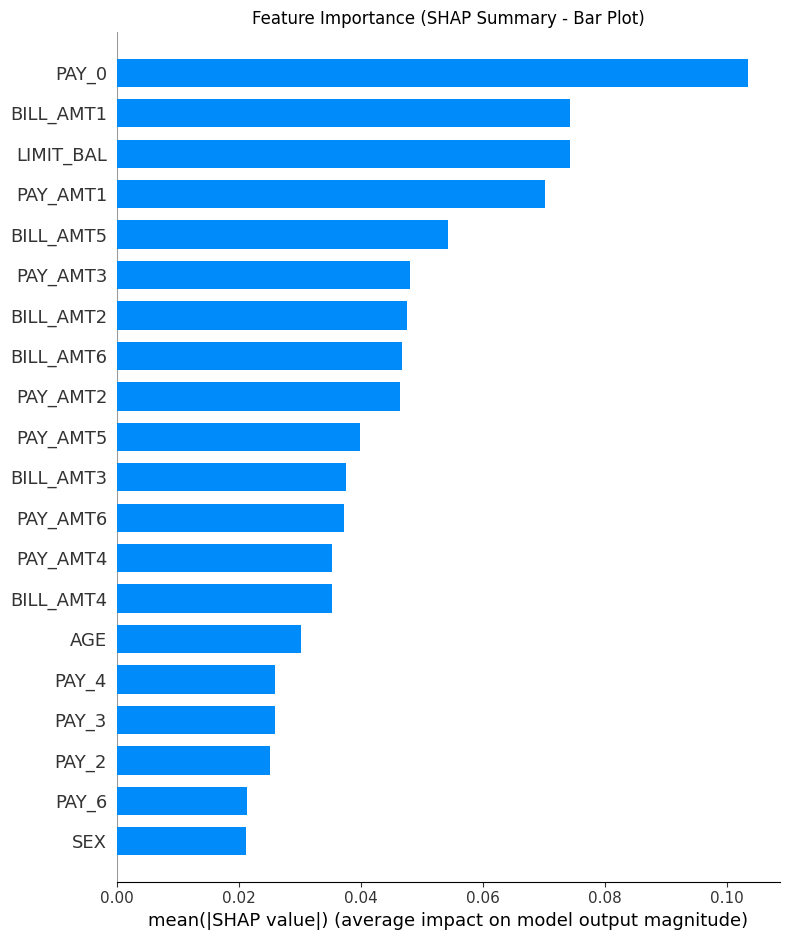

In [8]:
# Global Explainability
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values, X_test, plot_type="bar",show=False)
plt.title("Feature Importance (SHAP Summary - Bar Plot)")
plt.tight_layout()
plt.show()

/tmp/ipython-input-3938358113.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


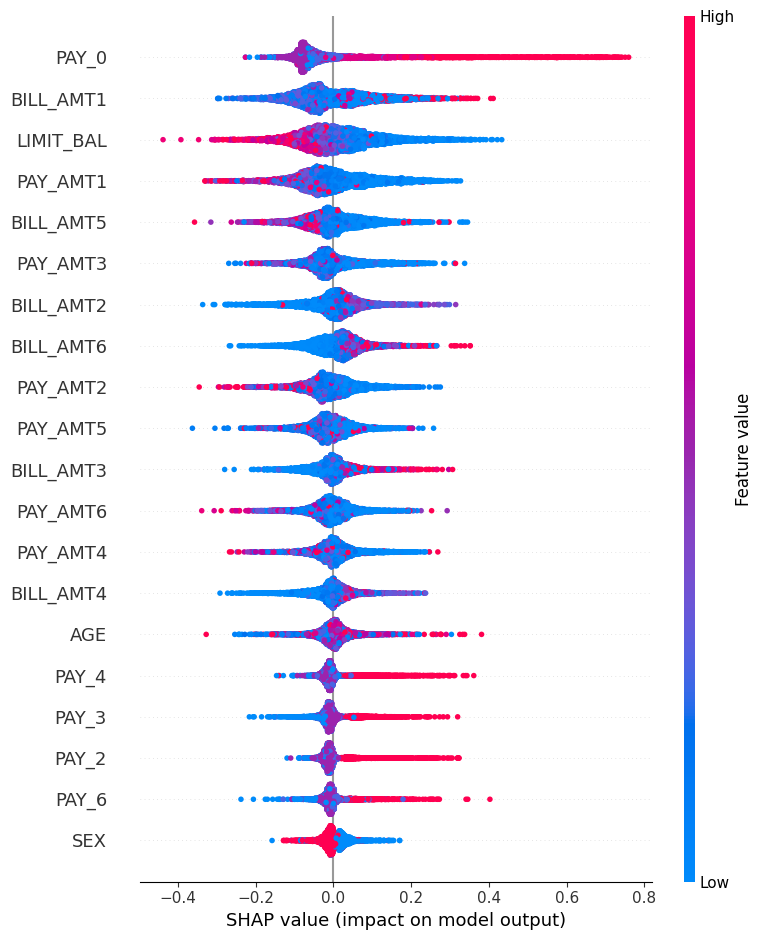

In [9]:
# Detailed SHAP Summary Plot
shap.summary_plot(shap_values, X_test)

In [10]:
# Local Explainability
# Pick random instance to explain
sample_idx = 10
sample = X_test.iloc[[sample_idx]]

In [11]:
print(f"Explaining sample index: {sample_idx}")
print(sample)

Explaining sample index: 10
    LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
10  -0.597371 -0.482066  -0.582008   -0.60562  -0.199552  -0.533663   

    BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  ...  PAY_AMT6  SEX  EDUCATION  \
10  -0.633095    -0.2614 -0.345836  1.363779  ... -0.292992  2.0        1.0   

    MARRIAGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  
10       1.0    1.0    2.0   -1.0    0.0    0.0   -1.0  

[1 rows x 23 columns]


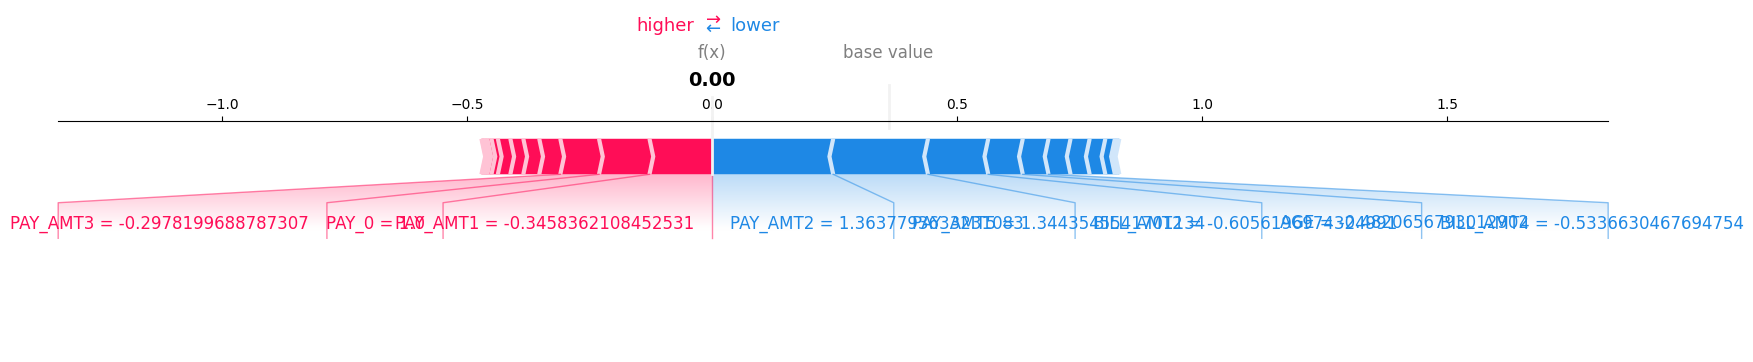

In [16]:
# Local explanation
shap.force_plot(
    shap_values[sample_idx, :],
    sample,
    matplotlib=True
)

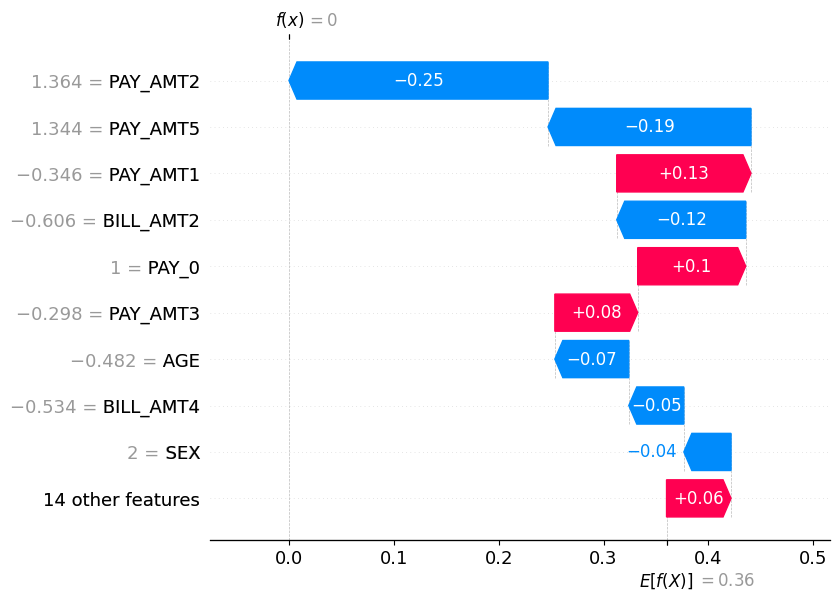

In [ ]:
shap.plots.waterfall(shap_values[sample_idx])


 Generating feature dependence plots...
Plotting dependence for: BILL_AMT5


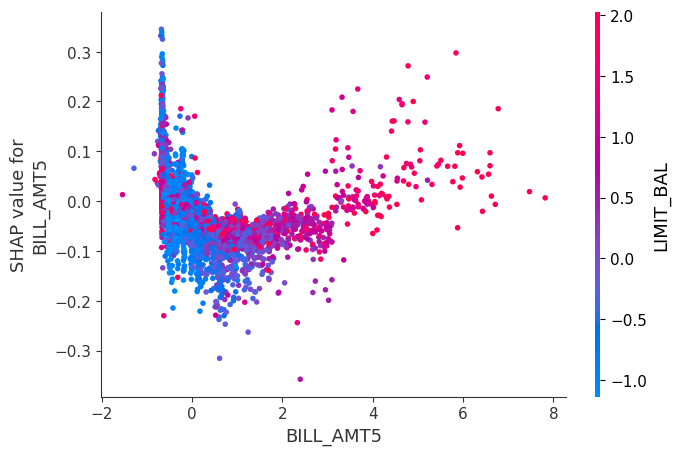

Plotting dependence for: PAY_AMT1


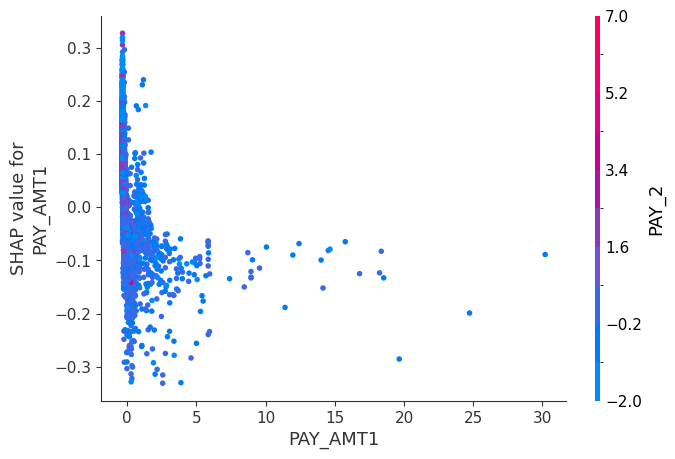

Plotting dependence for: LIMIT_BAL


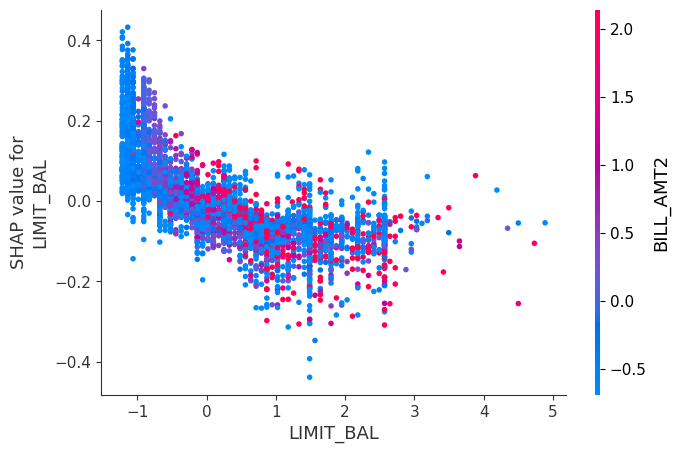

Plotting dependence for: BILL_AMT1


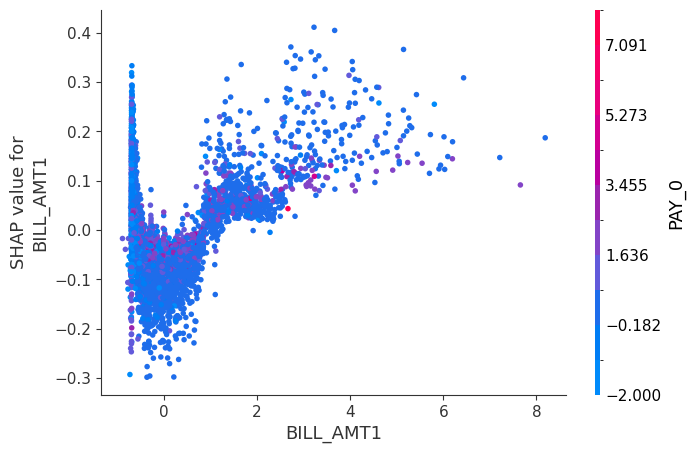

Plotting dependence for: PAY_0


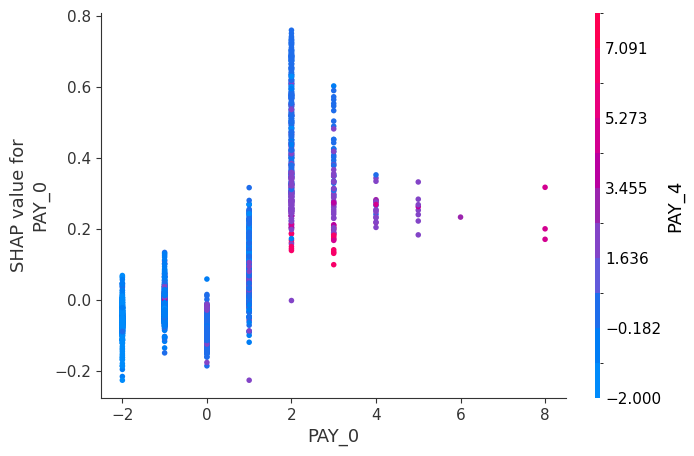

In [14]:
# Dependence Plot
print("\n Generating feature dependence plots...")

# Extract numpy array safely from Explanation object
shap_values_array = shap_values.values if hasattr(shap_values, "values") else shap_values

# Compute top 5 important features
top_features = np.argsort(np.abs(shap_values_array).mean(0))[-5:]

# Generate dependence plots for each
for feature_idx in top_features:
    feature_name = X_test.columns[feature_idx]
    print(f"Plotting dependence for: {feature_name}")
    shap.dependence_plot(feature_name, shap_values_array, X_test)